# Supervised learning
## 1. Import the monthly and annual data and join
* In both the annual and monthly features approach, join at the end with table of the clients responses. This is simply a table that contains the binary response of the client to our marketing effort as described above and that is the output or label or target that makes this a supervised learning problem.
#### 1.1 Import 6 tables

In [0]:
# File type
file_type = "csv"
# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# import annual data
annual_features = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/annual_features.csv")
 
annual_day_of_week_counts_pivot = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/annual_day_of_week_counts_pivot.csv")

# import monthly data
mth_rolling_features = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/mth_rolling_features.csv")

mth_day_counts = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/mth_day_counts.csv")

days_since_last_txn = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/days_since_last_txn.csv")

# Import Client Response
Retail_Data_Response = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/Retail_Data_Response.csv")

####1.2 Join the annual data(input) and monthly data(input) with client repsonse(output) repectively.

In [0]:
# Join annaul data with Client Response
annual_features_outputs = annual_features.join(annual_day_of_week_counts_pivot, 'customer_id', 'left_outer')
annual_features_outputs = Retail_Data_Response.join(annual_features_outputs, 'customer_id', 'left_outer')
display(annual_features_outputs)
print('The shape of the table is', annual_features_outputs.count(), ',',len(annual_features_outputs.columns),'.')

customer_id,response,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_min_2011,ann_txn_amt_min_2012,ann_txn_amt_min_2013,ann_txn_amt_min_2014,ann_txn_amt_min_2015,ann_txn_amt_sem_2011,ann_txn_amt_sem_2012,ann_txn_amt_sem_2013,ann_txn_amt_sem_2014,ann_txn_amt_sem_2015,ann_txn_amt_std_2011,ann_txn_amt_std_2012,ann_txn_amt_std_2013,ann_txn_amt_std_2014,ann_txn_amt_std_2015,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,cnt_2012_Sunday,cnt_2012_Thursday,cnt_2012_Tuesday,cnt_2012_Wednesday,cnt_2013_Friday,cnt_2013_Monday,cnt_2013_Saturday,cnt_2013_Sunday,cnt_2013_Thursday,cnt_2013_Tuesday,cnt_2013_Wednesday,cnt_2014_Friday,cnt_2014_Monday,cnt_2014_Saturday,cnt_2014_Sunday,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
CS1664,0,81.33333333,76.90909091,84.75,74.8,75.5,3,11,4,5,2,98,105,100,97,87,73,49,64,40,64,8.333333333,5.578293231,8.117624858,9.536246641,11.5,14.43375673,18.50110562,16.23524972,21.32369574,16.26345597,244,846,339,374,151,208.3333333,342.2909091,263.5833333,454.7,264.5,1,0,0,1,0,0,1,2,5,1,0,0,1,2,1,0,1,0,2,0,0,1,2,1,0,0,0,1,0,1,0,0,0,1,0
CS1802,0,71.5,78.5,80.7,55.75,60.85714286,2,4,10,4,7,94,86,104,72,96,49,71,35,39,35,22.5,3.227486122,6.988959547,8.09706737,7.449603925,31.81980515,6.454972244,22.10103064,16.19413474,19.70979935,143,314,807,223,426,1012.5,41.66666667,488.4555556,262.25,388.4761905,0,0,0,1,0,1,0,1,0,0,2,0,0,1,0,2,3,0,2,3,0,1,0,2,0,1,0,0,1,1,1,2,0,1,1
CS1151,0,70.0,69.0,63.0,69.14285714,52.66666667,2,1,3,7,3,81,69,91,104,73,59,69,43,48,36,11.0,0.0,14.4222051,8.559118144,10.8371788,15.55634919,0.0,24.97999199,22.64529805,18.7705443,140,69,189,484,158,242.0,0.0,624.0,512.8095238,352.3333333,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,1,2,1,0,1,0,0,0,0,0,2,1
CS1183,0,57.6,89.8,76.2,73.57142857,83.5,5,5,5,7,4,81,104,97,103,100,37,65,46,44,69,7.277362159,7.492663078,10.64612606,8.271745203,7.444237145,16.27267649,16.75410397,23.80546156,21.88498072,14.88847429,288,449,381,515,334,264.8,280.7,566.7,478.952381,221.6666667,1,0,1,2,1,0,0,0,1,0,1,1,0,2,0,0,0,1,2,1,1,1,3,1,1,0,0,1,0,0,0,1,2,0,1
CS1231,0,76.2,75.28571429,79.0,72.25,0.0,5,7,7,4,0,101,105,93,89,0,40,58,63,43,0,11.29778739,5.467280536,4.488079449,10.40332479,0.0,25.26262061,14.46506465,11.87434209,20.80664958,0.0,381,527,553,289,0,638.2,209.2380952,141.0,432.9166667,0.0,0,0,1,2,1,1,0,0,0,2,0,0,1,4,0,0,3,1,2,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0
CS1553,1,61.0,82.0,63.5,72.5,0.0,4,8,4,4,0,77,105,100,92,0,46,67,39,40,0,6.416125518,5.477225575,13.19406432,11.28789913,0.0,12.83225104,15.49193338,26.38812864,22.57579825,0.0,244,656,254,290,0,164.6666667,240.0,696.3333333,509.6666667,0.0,1,0,0,1,0,0,2,3,1,1,1,0,1,1,0,0,2,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0
CS1860,0,0.0,83.0,63.6,61.57142857,64.0,0,3,5,7,1,0,101,82,92,64,0,55,47,44,64,0.0,14.18919777,7.297944916,7.434978922,0.0,0.0,24.57641145,16.31870093,19.67110523,0.0,0,249,318,431,64,0.0,604.0,266.3,386.952381,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,2,0,2,3,0,0,1,1,0,1,0,0,0,0,0
CS1521,0,98.0,77.5,75.5,56.0,0.0,1,4,2,2,0,98,88,82,72,0,98,53,69,40,0,0.0,8.231038817,6.5,16.0,0.0,0.0,16.46207763,9.192388155,22.627417,0.0,98,310,151,112,0,0.0,271.0,84.5,512.0,0.0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
CS1687,0,61.4,79.8,73.0,86.6,79.0,5,5,6,5,1,84,100

The shape of the table is 6884 , 77 .


In [0]:
# Join monthly data with Client Response
temp = mth_rolling_features.join(mth_day_counts, on = ['CLNT_NO', 'ME_DT'],how = 'left_outer').join(days_since_last_txn, 
                                                                                                    on = ['CLNT_NO', 'ME_DT'],how = 'left_outer')
# Notice the column name indicating ids are 'customer_id' in Retail_Data_Response, but 'CLNT_NO' in all of the 3 tables of monthly data. 
temp = temp.withColumnRenamed('CLNT_NO','customer_id')
monthly_features_outputs = Retail_Data_Response.join(temp, how = 'left_outer', on =['customer_id']).orderBy(['customer_id', 'ME_DT']).drop('_c0')
monthly_features_outputs.display()
print('The shape of the table is', monthly_features_outputs.count(),',', len(monthly_features_outputs.columns),'.')

customer_id,response,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn
CS1112,0,2011-05-31T00:00:00.000+0000,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0,0,0,0,0,0,0,32
CS1112,0,2011-06-30T00:00:00.000+0000,56,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0,0,0,0,0,0,1,15
CS1112,0,2011-07-31T00:00:00.000+0000,0,0,56,18.66666667,56,1,0.333333333,1,null,null,null,null,null,null,null,null,null,null,null,null,0,0,0,0,0,0,0,46
CS1112,0,2011-08-31T00:00:00.000+0000,96,1,152,50.66666667,96,2,0.666666667,1,null,null,null,null,null,null,null,null,null,null,null,null,1,0,0,0,0,0,0,12
CS1112,0,2011-09-30T00:00:00.000+0000,0,0,96,32.0,96,1,0.333333333,1,null,null,null,null,null,null,null,null,null,null,null,null,0,0,0,0,0,0,0,42
CS1112,0,2011-10-31T00:00:00.000+0000,60,1,156,52.0,96,2,0.666666667,1,212,35.33333333,96,3,0.5,1,null,null,null,null,null,null,0,0,0,1,0,0,0,29
CS1112,0,2011-11-30T00:00:00.000+0000,0,0,60,20.0,60,1,0.333333333,1,212,35.33333333,96,3,0.5,1,null,null,null,null,null,null,0,0,0,0,0,0,0,59
CS1112,0,2011-12-31T00:00:00.000+0000,0,0,60,20.0,60,1,0.333333333,1,156,26.0,96,2,0.333333333,1,null,null,null,null,null,null,0,0,0,0,0,0,0,90
CS1112,0,2012-01-31T00:00:00.000+0000,0,0,0,0.0,0,0,0.0,0,156,26.0,96,2,0.333333333,1,null,null,null,null,null,null,0,0,0,0,0,0,0,121
CS1112,0,2012-02-29T00:00:00.000+0000,0,0,0,0.0,0,0,0.0,0,60,10.0,60,1,0.166666667,1,null,null,null,null,null,null,0,0,0,0,0,0,0,150


The shape of the table is 323548 , 31 .


## 2. Steps for each method
- For both annual_features_outputs and monthly_features_outputs, use the following 3 methods respectively:
  - Logistic Regression with L1 regularization
  - Decision Tree
  - Random Forest

### Annual

In [0]:
# Step 2.1: Separate the inputs X and the output y in two data frames.  <== Annual
# Step 2.2: Split the data in train and test set. Use a test size value of 2/3 and set the random state equal to 1148 for consistency. <== Annual

# Train/Test Split using randomSplit method
#annual_features_outputs_new = annual_features_outputs.drop('customer_id')         #As customer_id is an useless feature for prediction
trainDF_annual, testDF_annual = annual_features_outputs.randomSplit([1/3, 2/3], seed = 1148)
print(f"There are {trainDF_annual.cache().count()} rows in the training set, and {testDF_annual.cache().count()} in the test set")

There are 2307 rows in the training set, and 4577 in the test set


#### Annual, Method 1:  Logistic Regression
  -  Vector Assembler, Linear Regression expects a column of Vector type as input.

In [0]:
# Step 2.3: Pre-process (if necessary for the method)  <== Annual, LogReg

from pyspark.ml.feature import VectorAssembler,StandardScaler
vecAssembler_annual = VectorAssembler(inputCols= trainDF_annual.drop('response','customer_id').columns, outputCol="features")
vecTrainDF_annual = vecAssembler_annual.transform(trainDF_annual)   #training data
vecTestDF_annual = vecAssembler_annual.transform(testDF_annual)    #test data

# Fit StandardScaler onto the training data. 
scaler = StandardScaler().setInputCol('features').setOutputCol('scaled_features')
scaler_model = scaler.fit(vecTrainDF_annual)

# Use the scaler to transform the train and test data.
vecTrainDF_annual_scaled = scaler_model.transform(vecTrainDF_annual)
vecTestDF_annual_scaled = scaler_model.transform(vecTestDF_annual)

In [0]:
# Step 2.4.1: Fit the training dataset and optimize the hyperparameters of the method. <== Annual, LogReg
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Fit the training dataset
lr = LogisticRegression(featuresCol="features", labelCol="response", elasticNetParam=1)  #For alpha = 1, it is an L1 penalty.'
lrModel = lr.fit(vecTestDF_annual_scaled)

In [0]:
# Step 2.4.2: optimize the hyperparameters of the method  <== Annual, LogReg

# Create a BinaryClassificationEvaluator, choose evaluator calculates the area under the ROC(default), which combines the false positives and false negatives error of binary classifier.
evaluator = BinaryClassificationEvaluator(labelCol="response") 
grid = (ParamGridBuilder()
        .addGrid(lr.regParam, [0.01, .1, .1])  #regularization parameter
        .addGrid(lr.maxIter,[1,5,10])  #num of iterations(takes too much time, run it for better performance if time alllows.)
        .build()) 

pipeline = Pipeline(stages=[vecAssembler_annual, lrModel])
cv_lr_annual = CrossValidator(estimator=pipeline, estimatorParamMaps=grid, evaluator=evaluator, numFolds=3, seed=1148)
cvModel_lr_annual = cv_lr_annual.fit(trainDF_annual)
best_model_lr_annual = cvModel_lr_annual.bestModel
print('Best Param(MaxIter)',best_model_lr_annual.stages[-1]._java_obj.getMaxIter())
print('Best Param(regParam)',best_model_lr_annual.stages[-1]._java_obj.getRegParam())

Best Param(MaxIter) 1
Best Param(regParam) 0.01


Out[158]: ([<matplotlib.axis.XTick at 0x7f60d40cf4c0>,
 [Text(0, 0, 'ann_txn_amt_ave_2011'),
  Text(1, 0, 'ann_txn_amt_ave_2012'),
  Text(2, 0, 'ann_txn_amt_ave_2013'),
  Text(3, 0, 'ann_txn_amt_ave_2014'),
  Text(4, 0, 'ann_txn_amt_ave_2015'),
  Text(5, 0, 'ann_txn_amt_cnt_2011'),
  Text(6, 0, 'ann_txn_amt_cnt_2012'),
  Text(7, 0, 'ann_txn_amt_cnt_2013'),
  Text(8, 0, 'ann_txn_amt_cnt_2014'),
  Text(9, 0, 'ann_txn_amt_cnt_2015'),
  Text(10, 0, 'ann_txn_amt_max_2011'),
  Text(11, 0, 'ann_txn_amt_max_2012'),
  Text(12, 0, 'ann_txn_amt_max_2013'),
  Text(13, 0, 'ann_txn_amt_max_2014'),
  Text(14, 0, 'ann_txn_amt_max_2015'),
  Text(15, 0, 'ann_txn_amt_min_2011'),
  Text(16, 0, 'ann_txn_amt_min_2012'),
  Text(17, 0, 'ann_txn_amt_min_2013'),
  Text(18, 0, 'ann_txn_amt_min_2014'),
  Text(19, 0, 'ann_txn_amt_min_2015'),
  Text(20, 0, 'ann_txn_amt_sem_2011'),
  Text(21, 0, 'ann_txn_amt_sem_2012'),
  Text(22, 0, 'ann_txn_amt_sem_2013'),
  Text(23, 0, 'ann_txn_amt_sem_2014'),
  Text(24, 0, 'ann_

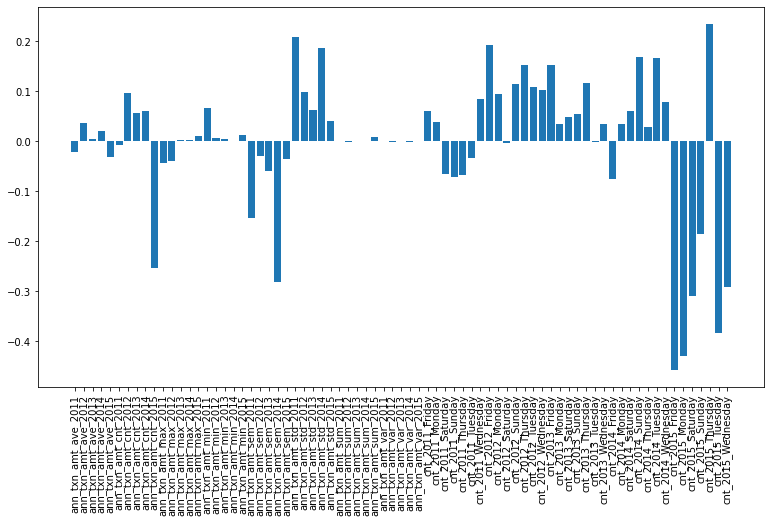

In [0]:
# Step 2.5: Plot coefficient values or feature importance. <== Annual, LogReg
import matplotlib.pyplot as plt
pd_train_annual = trainDF_annual.toPandas().drop('response', axis = 1).drop('customer_id', axis = 1)
plt.figure(figsize = (13, 7))
plt.bar(range(pd_train_annual.shape[1]), best_model_lr_annual.stages[-1].coefficients)
plt.xticks(range(pd_train_annual.shape[1]), pd_train_annual.columns, rotation=90)

Out[84]: Text(0, 0.5, 'Counts of clients')

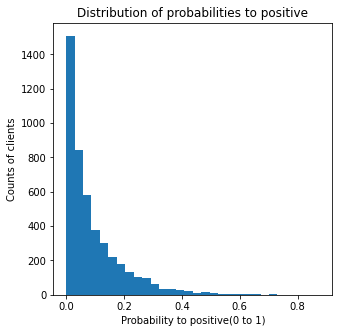

In [0]:
# Step 2.6: Plot probability distribution for test set. <== Annual, LogReg
from pyspark.ml.linalg import Vectors
from pyspark.ml.functions import vector_to_array

pred_test = best_model_lr_annual.transform(testDF_annual)
bins, counts = pred_test.select(vector_to_array("probability")[1]).rdd.flatMap(lambda x: x).histogram(30)
plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title('Distribution of probabilities to positive')
plt.xlabel('Probability to positive(0 to 1)')
plt.ylabel('Counts of clients')

In [0]:
# Step 2.7.1: Plot confusion matrix of train/test set. <== Annual, LogReg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
import numpy as np

def cm_plot(data, model,title):
    y_predicted = model.transform(data)
    cm = confusion_matrix(y_predicted.select("response").toPandas(), y_predicted.select("prediction").toPandas())
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 15,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.show()

    precision = precision_score(y_predicted.select("response").collect(), y_predicted.select("prediction").collect())
    recall = recall_score(y_predicted.select("response").collect(), y_predicted.select("prediction").collect())
    print('precision:', precision)
    print('recall', recall)


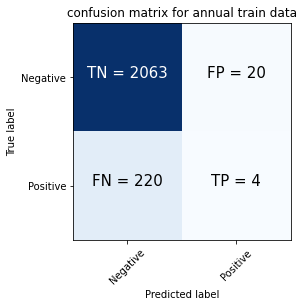

precision: 0.16666666666666666
recall 0.017857142857142856


In [0]:
cm_plot(trainDF_annual, best_model_lr_annual, 'confusion matrix for annual train data')

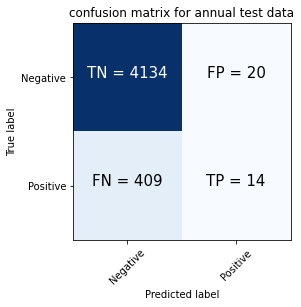

precision: 0.4117647058823529
recall 0.03309692671394799


In [0]:
cm_plot(testDF_annual, best_model_lr_annual, 'confusion matrix for annual test data')

In [0]:
# Step 2.7.2: Plot ROC curves of train/test set. Calculate precision/recall. <== Annual, LogReg
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
import numpy as np

def roc_train_test_curve(model,train_data,test_data, Title):
    pred_train = model.transform(train_data)
    pred_test = model.transform(test_data)
    scores_train = pred_train.select(vector_to_array("probability")[1]).rdd.keys().collect()
    scores_test = pred_test.select(vector_to_array("probability")[1]).rdd.keys().collect()
    y_train = pred_train.select("response").rdd.keys().collect()
    y_test= pred_test.select("response").rdd.keys().collect()
    
    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)  # ROC Calc Train set
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)  # ROC Calc Test set
    auc_train = auc(fpr_train, tpr_train)  # AUC Calc
    auc_test  = auc(fpr_test, tpr_test) # AUC Calc
      
    # Plotting
    plt.figure(figsize=(6,6))
    plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
    plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
    plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
    plt.ylim([0,1.0])
    plt.xlim([0,1.0])
    plt.title(Title, fontsize = 18)
    plt.ylabel('True positive rate', fontsize = 18)
    plt.xlabel('False positive rate', fontsize = 18)
    plt.legend()
    plt.show()

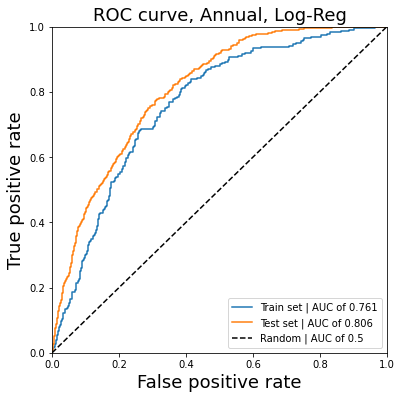

In [0]:
roc_train_test_curve(best_model_lr_annual,trainDF_annual,testDF_annual, 'ROC curve, Annual, Log-Reg')

#### Annual, Method 2: Decision Tree

In [0]:
# Step 2.3: Pre-process (if necessary for the method)  <== Annual, Decision Tree
# Algorithm does not depend on scaling of inputs. Do NOT have to pre-process data.

In [0]:
# Step 2.4: Fit the training dataset and optimize the hyperparameters of the method. <== Annual, Decision Tree
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol='features',labelCol="response")
dtModel = dt.fit(vecTrainDF_annual)
evaluator=BinaryClassificationEvaluator(labelCol="response")
grid = (ParamGridBuilder()
        .addGrid(dt.maxDepth, [2,5,10,20,30])
        #.addGrid(dt.maxBins, [200, 300, 400,500])
        .build())

pipeline = Pipeline(stages=[vecAssembler_annual, dtModel])
cv = CrossValidator(estimator=pipeline, estimatorParamMaps=grid, evaluator=evaluator, numFolds=3, seed=1148)
cv_dt_annual = CrossValidator(estimator=pipeline, estimatorParamMaps=grid, evaluator=evaluator, numFolds=3, seed=1148)
cvModel_dt_annual = cv_dt_annual.fit(trainDF_annual)
best_model_dt_annual = cvModel_dt_annual.bestModel
print('Best Param(maxDepth)',best_model_dt_annual.stages[-1]._java_obj.getMaxDepth())
#print('Best Param(maxBins)',best_model_dt_annual.stages[-1]._java_obj.getMaxBins())

Best Param(maxDepth) 2


Out[157]: ([<matplotlib.axis.XTick at 0x7f60d6693df0>,
 [Text(0, 0, 'ann_txn_amt_ave_2011'),
  Text(1, 0, 'ann_txn_amt_ave_2012'),
  Text(2, 0, 'ann_txn_amt_ave_2013'),
  Text(3, 0, 'ann_txn_amt_ave_2014'),
  Text(4, 0, 'ann_txn_amt_ave_2015'),
  Text(5, 0, 'ann_txn_amt_cnt_2011'),
  Text(6, 0, 'ann_txn_amt_cnt_2012'),
  Text(7, 0, 'ann_txn_amt_cnt_2013'),
  Text(8, 0, 'ann_txn_amt_cnt_2014'),
  Text(9, 0, 'ann_txn_amt_cnt_2015'),
  Text(10, 0, 'ann_txn_amt_max_2011'),
  Text(11, 0, 'ann_txn_amt_max_2012'),
  Text(12, 0, 'ann_txn_amt_max_2013'),
  Text(13, 0, 'ann_txn_amt_max_2014'),
  Text(14, 0, 'ann_txn_amt_max_2015'),
  Text(15, 0, 'ann_txn_amt_min_2011'),
  Text(16, 0, 'ann_txn_amt_min_2012'),
  Text(17, 0, 'ann_txn_amt_min_2013'),
  Text(18, 0, 'ann_txn_amt_min_2014'),
  Text(19, 0, 'ann_txn_amt_min_2015'),
  Text(20, 0, 'ann_txn_amt_sem_2011'),
  Text(21, 0, 'ann_txn_amt_sem_2012'),
  Text(22, 0, 'ann_txn_amt_sem_2013'),
  Text(23, 0, 'ann_txn_amt_sem_2014'),
  Text(24, 0, 'ann_

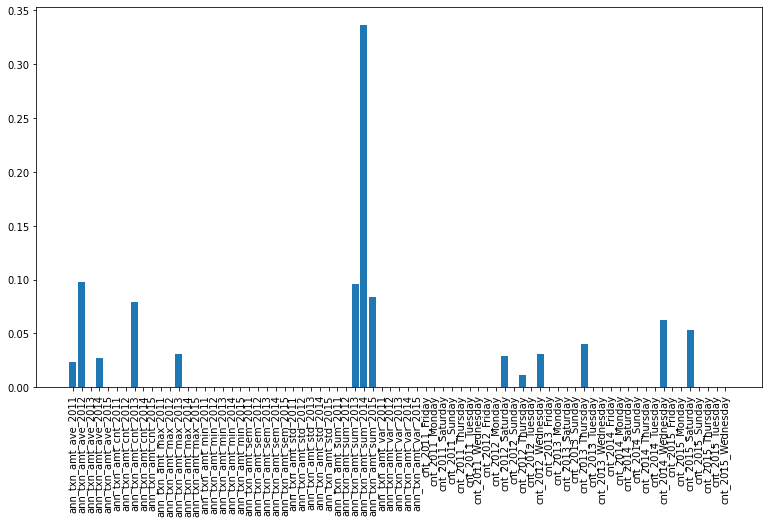

In [0]:
# Step 2.5: Plot coefficient values or feature importance. <== Annual, Decision Tree
plt.figure(figsize = (13, 7))
plt.bar(range(pd_train_annual.shape[1]), best_model_dt_annual.stages[-1].featureImportances)
plt.xticks(range(pd_train_annual.shape[1]), pd_train_annual.columns, rotation=90)

Out[162]: Text(0, 0.5, 'Counts of clients')

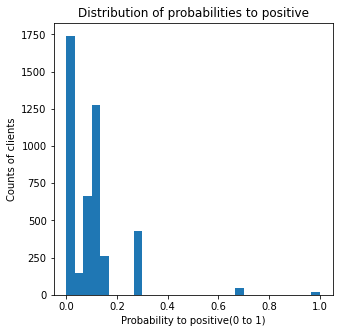

In [0]:
# Step 2.6: Plot probability distribution for test set. <== Annual, Decision Tree
pred_test = best_model_dt_annual.transform(testDF_annual)
bins, counts = pred_test.select(vector_to_array("probability")[1]).rdd.flatMap(lambda x: x).histogram(30)
plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title('Distribution of probabilities to positive')
plt.xlabel('Probability to positive(0 to 1)')
plt.ylabel('Counts of clients')

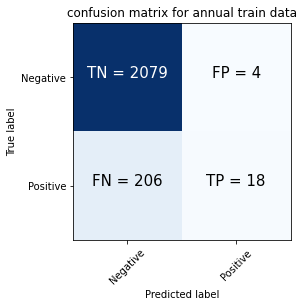

precision: 0.8181818181818182
recall 0.08035714285714286


In [0]:
# Step 2.7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall. <== Annual, Decision Tree
cm_plot(trainDF_annual, best_model_dt_annual, 'confusion matrix for annual train data')

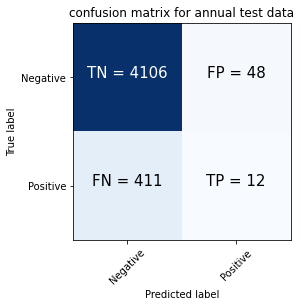

precision: 0.2
recall 0.028368794326241134


In [0]:
cm_plot(testDF_annual, best_model_dt_annual, 'confusion matrix for annual test data')

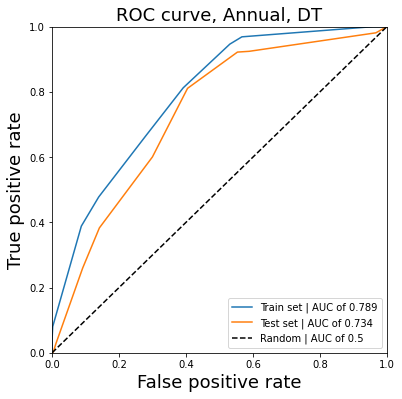

In [0]:
roc_train_test_curve(best_model_dt_annual,trainDF_annual,testDF_annual, 'ROC curve, Annual, DT')

#### Annual, Method 3: Random Forest

In [0]:
# Step 2.3: Pre-process (if necessary for the method)  <== Annual, Random Forest

In [0]:
# Step 2.4: Fit the training dataset and optimize the hyperparameters of the method. <== Annual, Random Forest
from pyspark.ml.classification import RandomForestClassifier
rf_annual = RandomForestClassifier(featuresCol='features',labelCol="response")
rfModel_annual = rf_annual.fit(vecTrainDF_annual)

evaluator = BinaryClassificationEvaluator(labelCol="response")
grid = (ParamGridBuilder().addGrid(rf_annual.maxDepth,[2,5,10,15,20,25]).build())
pipeline = Pipeline(stages=[vecAssembler_annual, rfModel_annual])
cv_rf_annual = CrossValidator(estimator=pipeline,estimatorParamMaps=grid, evaluator=evaluator, numFolds=3, seed=1148)
cvModel_rf_annual = cv_rf_annual.fit(trainDF_annual)
best_model_rf_annual = cvModel_rf_annual.bestModel
print('Best Param(maxDepth)', best_model_rf_annual.stages[-1]._java_obj.getMaxDepth())

Best Param(maxDepth) 2


Out[171]: ([<matplotlib.axis.XTick at 0x7f60d3ea6790>,
 [Text(0, 0, 'ann_txn_amt_ave_2011'),
  Text(1, 0, 'ann_txn_amt_ave_2012'),
  Text(2, 0, 'ann_txn_amt_ave_2013'),
  Text(3, 0, 'ann_txn_amt_ave_2014'),
  Text(4, 0, 'ann_txn_amt_ave_2015'),
  Text(5, 0, 'ann_txn_amt_cnt_2011'),
  Text(6, 0, 'ann_txn_amt_cnt_2012'),
  Text(7, 0, 'ann_txn_amt_cnt_2013'),
  Text(8, 0, 'ann_txn_amt_cnt_2014'),
  Text(9, 0, 'ann_txn_amt_cnt_2015'),
  Text(10, 0, 'ann_txn_amt_max_2011'),
  Text(11, 0, 'ann_txn_amt_max_2012'),
  Text(12, 0, 'ann_txn_amt_max_2013'),
  Text(13, 0, 'ann_txn_amt_max_2014'),
  Text(14, 0, 'ann_txn_amt_max_2015'),
  Text(15, 0, 'ann_txn_amt_min_2011'),
  Text(16, 0, 'ann_txn_amt_min_2012'),
  Text(17, 0, 'ann_txn_amt_min_2013'),
  Text(18, 0, 'ann_txn_amt_min_2014'),
  Text(19, 0, 'ann_txn_amt_min_2015'),
  Text(20, 0, 'ann_txn_amt_sem_2011'),
  Text(21, 0, 'ann_txn_amt_sem_2012'),
  Text(22, 0, 'ann_txn_amt_sem_2013'),
  Text(23, 0, 'ann_txn_amt_sem_2014'),
  Text(24, 0, 'ann_

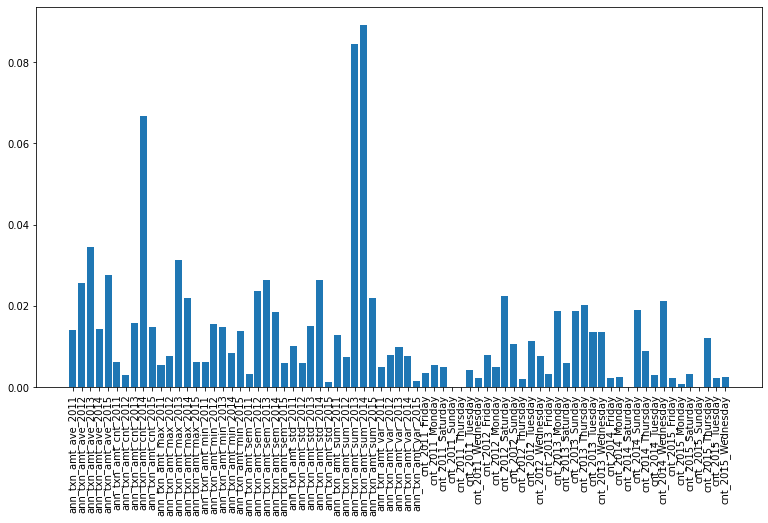

In [0]:
# Step 2.5: Plot coefficient values or feature importance. <== Annual, Random Forest
plt.figure(figsize = (13, 7))
plt.bar(range(pd_train_annual.shape[1]), best_model_rf_annual.stages[-1].featureImportances)
plt.xticks(range(pd_train_annual.shape[1]), pd_train_annual.columns, rotation=90)

Out[169]: Text(0, 0.5, 'Counts of clients')

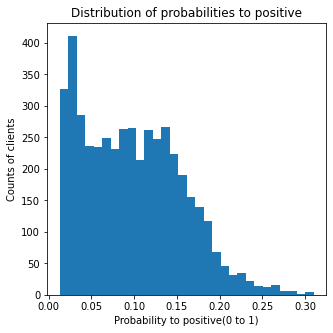

In [0]:
# Step 2.6: Plot probability distribution for test set. <== Annual, Random Forest

pred_test = best_model_rf_annual.transform(testDF_annual)
bins, counts = pred_test.select(vector_to_array("probability")[1]).rdd.flatMap(lambda x: x).histogram(30)
plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title('Distribution of probabilities to positive')
plt.xlabel('Probability to positive(0 to 1)')
plt.ylabel('Counts of clients')

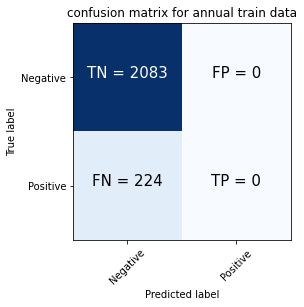

/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
precision: 0.0
recall 0.0


In [0]:
# Step 2.7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall. <== Annual, Random Forest
cm_plot(trainDF_annual, best_model_rf_annual, 'confusion matrix for annual train data')

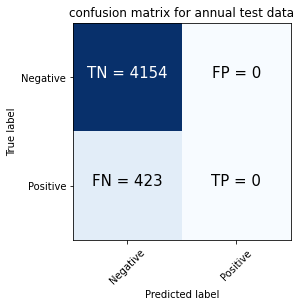

/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
precision: 0.0
recall 0.0


In [0]:
cm_plot(testDF_annual, best_model_rf_annual, 'confusion matrix for annual test data')

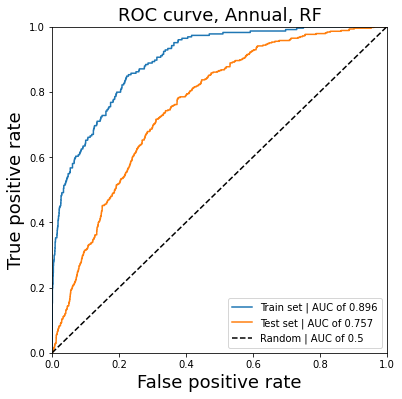

In [0]:
roc_train_test_curve(best_model_rf_annual,trainDF_annual,testDF_annual, 'ROC curve, Annual, RF')

### Monthly

In [0]:
# Step 2.1: Separate the inputs X and the output y in two data frames.  <== Monthly
X_monthly = monthly_features_outputs.drop('response').drop('customer_id')  #drop columns, output and customer_id
y_monthly = monthly_features_outputs[['response']]

In [0]:
# Step 2.1: Separate the inputs X and the output y in two data frames.  <== Monthly
# Step 2.2: Split the data in train and test set. Use a test size value of 2/3 and set the random state equal to 1148 for consistency. <== Monthly

# Train/Test Split using randomSplit method
#annual_features_outputs_new = annual_features_outputs.drop('customer_id')         #As customer_id is an useless feature for prediction
trainDF_monthly, testDF_monthly = monthly_features_outputs.randomSplit([1/3, 2/3], seed = 1148)
trainDF_monthly = trainDF_monthly.drop('customer_id','ME_DT').fillna(0)
testDF_monthly = testDF_monthly.drop('customer_id','ME_DT').fillna(0)
print(f"There are {trainDF_monthly.cache().count()} rows in the training set, and {testDF_monthly.cache().count()} in the test set")

There are 107936 rows in the training set, and 215553 in the test set


#### Monthly, Method 1:  Logistic Regression

In [0]:
# Step 2.3: Pre-process (if necessary for the method)  <== Monthly, LogReg
from pyspark.ml.feature import VectorAssembler,StandardScaler
vecAssembler_monthly = VectorAssembler(inputCols= trainDF_monthly.drop('response','customer_id','ME_DT').columns, outputCol="features")
vecTrainDF_monthly = vecAssembler_monthly.transform(trainDF_monthly)   #training data
vecTestDF_monthly = vecAssembler_monthly.transform(testDF_monthly)    #test data

# Fit StandardScaler onto the training data. 
scaler = StandardScaler().setInputCol('features').setOutputCol('scaled_features')
scaler_model = scaler.fit(vecTrainDF_monthly)

# Use the scaler to transform the train and test data.
vecTrainDF_monthly_scaled = scaler_model.transform(vecTrainDF_monthly)
vecTestDF_monthly_scaled = scaler_model.transform(vecTestDF_monthly)


In [0]:
# Step 2.4: Fit the training dataset and optimize the hyperparameters of the method. <== Monthly, LogReg
# Fit the training dataset
lr = LogisticRegression(featuresCol="features", labelCol="response", elasticNetParam=1)  #For alpha = 1, it is an L1 penalty.'
lrModel = lr.fit(vecTestDF_monthly_scaled)

# Create a BinaryClassificationEvaluator, choose evaluator calculates the area under the ROC(default), which combines the false positives and false negatives error of binary classifier.
evaluator = BinaryClassificationEvaluator(labelCol="response") 
grid = (ParamGridBuilder()
        .addGrid(lr.regParam, [0.01, .1, .1])  #regularization parameter
        .addGrid(lr.maxIter,[1,5,10]) 
        .build()) 

pipeline = Pipeline(stages=[vecAssembler_monthly, lrModel])
cv_lr_monthly = CrossValidator(estimator=pipeline, estimatorParamMaps=grid, evaluator=evaluator, numFolds=3, seed=1148)
cvModel_lr_monthly = cv_lr_monthly.fit(trainDF_monthly)
best_model_lr_monthly = cvModel_lr_monthly.bestModel
print('Best Param(MaxIter)',best_model_lr_monthly.stages[-1]._java_obj.getMaxIter())
print('Best Param(regParam)',best_model_lr_monthly.stages[-1]._java_obj.getRegParam())

Best Param(MaxIter) 5
Best Param(regParam) 0.1


Out[141]: ([<matplotlib.axis.XTick at 0x7f60d69ed9d0>,
 [Text(0, 0, 'mth_txn_amt_sum'),
  Text(1, 0, 'mth_txn_amt_cnt'),
  Text(2, 0, 'amt_sum_3M'),
  Text(3, 0, 'amt_mean_3M'),
  Text(4, 0, 'amt_max_3M'),
  Text(5, 0, 'txn_cnt_sum_3M'),
  Text(6, 0, 'txn_cnt_mean_3M'),
  Text(7, 0, 'txn_cnt_max_3M'),
  Text(8, 0, 'amt_sum_6M'),
  Text(9, 0, 'amt_mean_6M'),
  Text(10, 0, 'amt_max_6M'),
  Text(11, 0, 'txn_cnt_sum_6M'),
  Text(12, 0, 'txn_cnt_mean_6M'),
  Text(13, 0, 'txn_cnt_max_6M'),
  Text(14, 0, 'amt_sum_12M'),
  Text(15, 0, 'amt_mean_12M'),
  Text(16, 0, 'amt_max_12M'),
  Text(17, 0, 'txn_cnt_sum_12M'),
  Text(18, 0, 'txn_cnt_mean_12M'),
  Text(19, 0, 'txn_cnt_max_12M'),
  Text(20, 0, 'cnt_Friday'),
  Text(21, 0, 'cnt_Monday'),
  Text(22, 0, 'cnt_Saturday'),
  Text(23, 0, 'cnt_Sunday'),
  Text(24, 0, 'cnt_Thursday'),
  Text(25, 0, 'cnt_Tuesday'),
  Text(26, 0, 'cnt_Wednesday'),
  Text(27, 0, 'days_since_last_txn')])

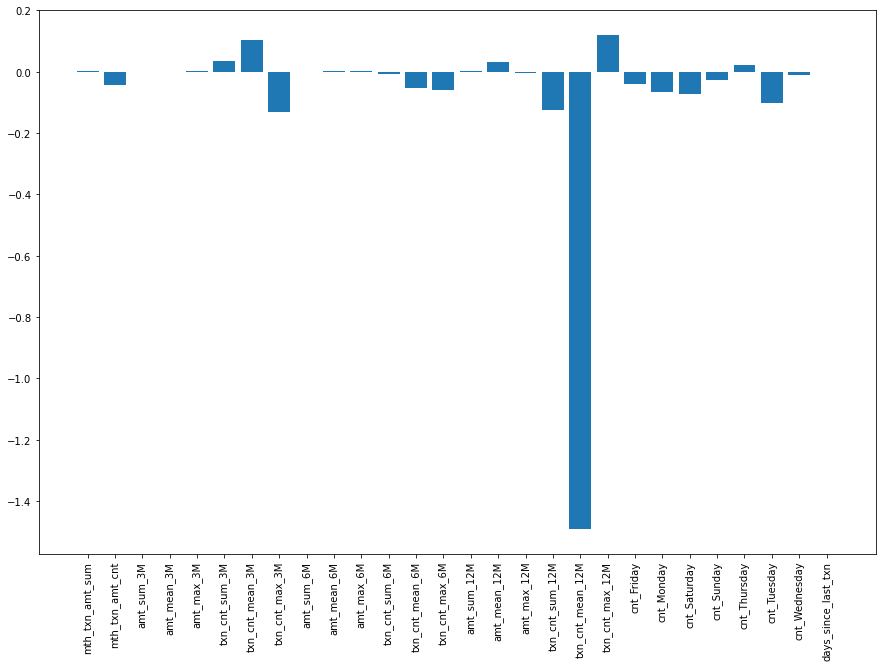

In [0]:
# Step 2.5: Plot coefficient values or feature importance. <== Monthly, LogReg
coeff = best_model_lr_monthly.stages[-1].coefficients
pd_train_monthly = trainDF_monthly.toPandas().drop('response', axis = 1)
plt.figure(figsize = (13, 7))
plt.bar(range(pd_train_monthly.shape[1]), coeff)
plt.xticks(range(pd_train_monthly.shape[1]), pd_train_monthly.columns, rotation=90)

Out[143]: Text(0, 0.5, 'Counts of clients')

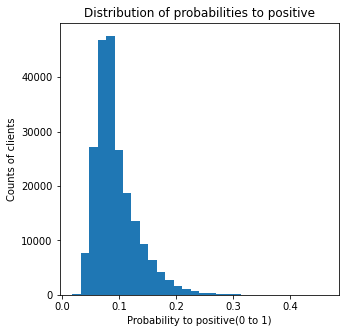

In [0]:
# Step 2.6: Plot probability distribution for test set. <== Monthly, LogReg
pred_test = best_model_lr_monthly.transform(testDF_monthly)
bins, counts = pred_test.select(vector_to_array("probability")[1]).rdd.flatMap(lambda x: x).histogram(30)
plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title('Distribution of probabilities to positive')
plt.xlabel('Probability to positive(0 to 1)')
plt.ylabel('Counts of clients')

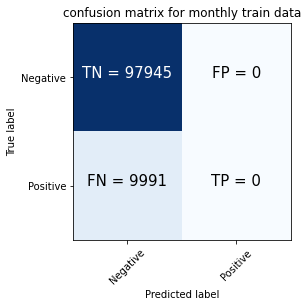

/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
precision: 0.0
recall 0.0


In [0]:
# Step 2.7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall. <== Monthly, LogReg
cm_plot(trainDF_monthly, best_model_lr_monthly, 'confusion matrix for monthly train data')

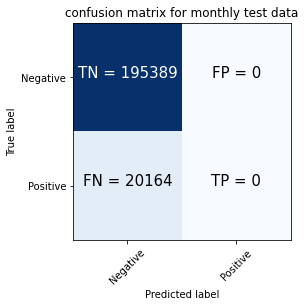

/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
precision: 0.0
recall 0.0


In [0]:
cm_plot(testDF_monthly, best_model_lr_monthly, 'confusion matrix for monthly test data')

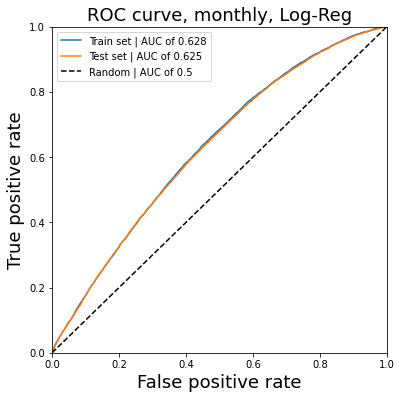

In [0]:
roc_train_test_curve(best_model_lr_monthly,trainDF_monthly,testDF_monthly, 'ROC curve, monthly, Log-Reg')

#### Monthly, Method 2: Decision Tree

In [0]:
# Step 2.4: Fit the training dataset and optimize the hyperparameters of the method. <== Annual, Decision Tree
dt = DecisionTreeClassifier(featuresCol='features',labelCol="response")
dtModel_monthly = dt.fit(vecTrainDF_monthly)

evaluator=BinaryClassificationEvaluator(labelCol="response")
grid = (ParamGridBuilder()
        .addGrid(dt.maxDepth, [2,5,10,15,20])
        #.addGrid(dt.maxBins, [200, 300, 400,500])
        .build())

pipeline = Pipeline(stages=[vecAssembler_monthly, dtModel_monthly])
cv_dt_monthly = CrossValidator(estimator=pipeline, estimatorParamMaps=grid, evaluator=evaluator, numFolds=3, seed=1148)
cvModel_dt_monthly = cv_dt_monthly.fit(trainDF_monthly)
best_model_dt_monthly = cvModel_dt_monthly.bestModel
print('Best Param(maxDepth)',best_model_dt_monthly.stages[-1]._java_obj.getMaxDepth())
#print('Best Param(maxBins)',best_model_dt_monthly.stages[-1]._java_obj.getMaxBins())

Best Param(maxDepth) 2


Out[184]: ([<matplotlib.axis.XTick at 0x7f60cc299640>,
 [Text(0, 0, 'mth_txn_amt_sum'),
  Text(1, 0, 'mth_txn_amt_cnt'),
  Text(2, 0, 'amt_sum_3M'),
  Text(3, 0, 'amt_mean_3M'),
  Text(4, 0, 'amt_max_3M'),
  Text(5, 0, 'txn_cnt_sum_3M'),
  Text(6, 0, 'txn_cnt_mean_3M'),
  Text(7, 0, 'txn_cnt_max_3M'),
  Text(8, 0, 'amt_sum_6M'),
  Text(9, 0, 'amt_mean_6M'),
  Text(10, 0, 'amt_max_6M'),
  Text(11, 0, 'txn_cnt_sum_6M'),
  Text(12, 0, 'txn_cnt_mean_6M'),
  Text(13, 0, 'txn_cnt_max_6M'),
  Text(14, 0, 'amt_sum_12M'),
  Text(15, 0, 'amt_mean_12M'),
  Text(16, 0, 'amt_max_12M'),
  Text(17, 0, 'txn_cnt_sum_12M'),
  Text(18, 0, 'txn_cnt_mean_12M'),
  Text(19, 0, 'txn_cnt_max_12M'),
  Text(20, 0, 'cnt_Friday'),
  Text(21, 0, 'cnt_Monday'),
  Text(22, 0, 'cnt_Saturday'),
  Text(23, 0, 'cnt_Sunday'),
  Text(24, 0, 'cnt_Thursday'),
  Text(25, 0, 'cnt_Tuesday'),
  Text(26, 0, 'cnt_Wednesday'),
  Text(27, 0, 'days_since_last_txn')])

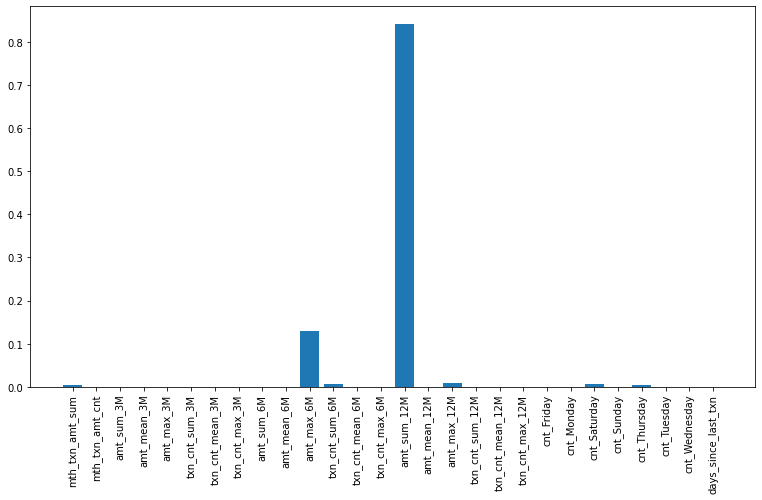

In [0]:
# Step 2.5: Plot coefficient values or feature importance. <== Annual, Decision Tree
plt.figure(figsize = (13, 7))
plt.bar(range(pd_train_monthly.shape[1]), best_model_dt_monthly.stages[-1].featureImportances)
plt.xticks(range(pd_train_monthly.shape[1]), pd_train_monthly.columns, rotation=90)

Out[183]: Text(0, 0.5, 'Counts of clients')

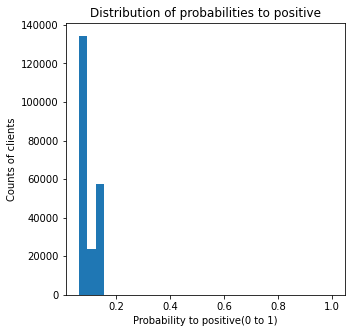

In [0]:
# Step 2.6: Plot probability distribution for test set. <== Annual, Decision Tree
pred_test = best_model_dt_monthly.transform(testDF_monthly)
bins, counts = pred_test.select(vector_to_array("probability")[1]).rdd.flatMap(lambda x: x).histogram(30)
plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title('Distribution of probabilities to positive')
plt.xlabel('Probability to positive(0 to 1)')
plt.ylabel('Counts of clients')

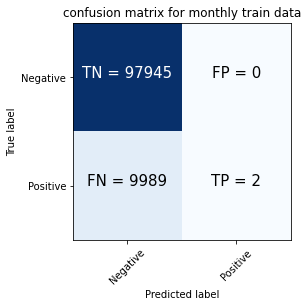

precision: 1.0
recall 0.00020018016214593134


In [0]:
# Step 2.7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall. <== Annual, Decision Tree
cm_plot(trainDF_monthly, best_model_dt_monthly, 'confusion matrix for monthly train data')

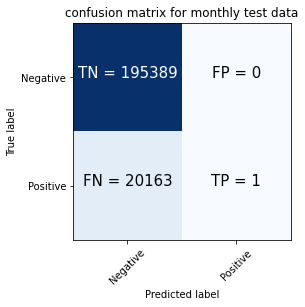

precision: 1.0
recall 4.959333465582226e-05


In [0]:
cm_plot(testDF_monthly, best_model_dt_monthly, 'confusion matrix for monthly test data')

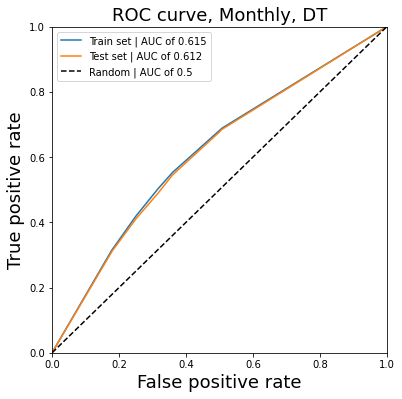

In [0]:
roc_train_test_curve(best_model_dt_monthly,trainDF_monthly,testDF_monthly, 'ROC curve, Monthly, DT')

#### Monthly, Method 3: Random Forest

In [0]:
# Step 2.4: Fit the training dataset and optimize the hyperparameters of the method. <== Monthly, Random Forest
rf = RandomForestClassifier(featuresCol='features',labelCol="response")
rfModel_monthly = rf.fit(vecTrainDF_monthly)

evaluator = BinaryClassificationEvaluator(labelCol="response")
grid = (ParamGridBuilder()
        .addGrid(rf.maxDepth,[2,5,10,15,20])
        .build())
pipeline = Pipeline(stages=[vecAssembler_monthly, rfModel_monthly])
cv_rf_monthly = CrossValidator(estimator=pipeline,estimatorParamMaps=grid, evaluator=evaluator, numFolds=3, seed=1148)
cvModel_rf_monthly = cv_rf_monthly.fit(trainDF_monthly)
best_model_rf_monthly = cvModel_rf_monthly.bestModel
print('Best Param(maxDepth)', best_model_rf_monthly.stages[-1]._java_obj.getMaxDepth())

Best Param(maxDepth) 2


Out[189]: ([<matplotlib.axis.XTick at 0x7f60d3ffb730>,
 [Text(0, 0, 'mth_txn_amt_sum'),
  Text(1, 0, 'mth_txn_amt_cnt'),
  Text(2, 0, 'amt_sum_3M'),
  Text(3, 0, 'amt_mean_3M'),
  Text(4, 0, 'amt_max_3M'),
  Text(5, 0, 'txn_cnt_sum_3M'),
  Text(6, 0, 'txn_cnt_mean_3M'),
  Text(7, 0, 'txn_cnt_max_3M'),
  Text(8, 0, 'amt_sum_6M'),
  Text(9, 0, 'amt_mean_6M'),
  Text(10, 0, 'amt_max_6M'),
  Text(11, 0, 'txn_cnt_sum_6M'),
  Text(12, 0, 'txn_cnt_mean_6M'),
  Text(13, 0, 'txn_cnt_max_6M'),
  Text(14, 0, 'amt_sum_12M'),
  Text(15, 0, 'amt_mean_12M'),
  Text(16, 0, 'amt_max_12M'),
  Text(17, 0, 'txn_cnt_sum_12M'),
  Text(18, 0, 'txn_cnt_mean_12M'),
  Text(19, 0, 'txn_cnt_max_12M'),
  Text(20, 0, 'cnt_Friday'),
  Text(21, 0, 'cnt_Monday'),
  Text(22, 0, 'cnt_Saturday'),
  Text(23, 0, 'cnt_Sunday'),
  Text(24, 0, 'cnt_Thursday'),
  Text(25, 0, 'cnt_Tuesday'),
  Text(26, 0, 'cnt_Wednesday'),
  Text(27, 0, 'days_since_last_txn')])

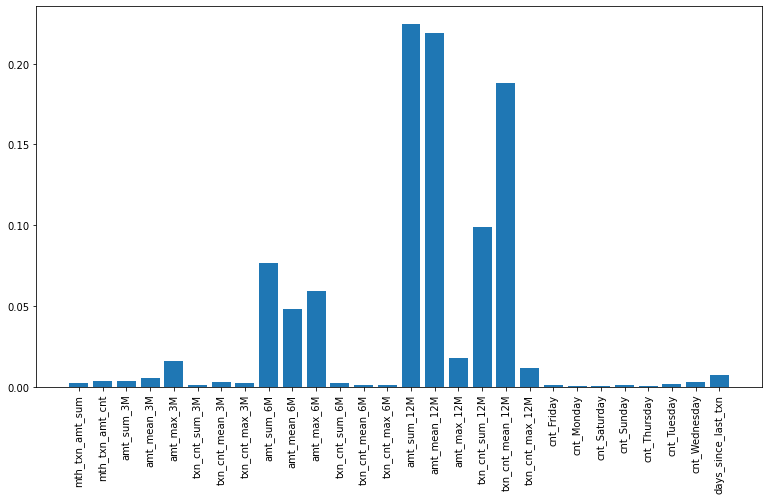

In [0]:
# Step 2.5: Plot coefficient values or feature importance. <== Monthly, Random Forest
plt.figure(figsize = (13, 7))
plt.bar(range(pd_train_monthly.shape[1]), best_model_rf_monthly.stages[-1].featureImportances)
plt.xticks(range(pd_train_monthly.shape[1]), pd_train_monthly.columns, rotation=90)

Out[194]: Text(0, 0.5, 'Counts of clients')

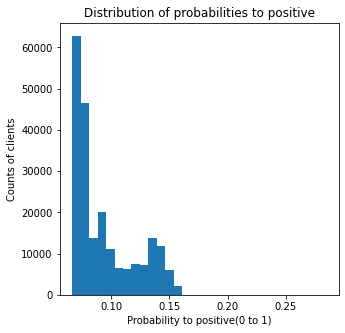

In [0]:
# Step 2.6: Plot probability distribution for test set. <== Monthly, Random Forest
pred_test = best_model_rf_monthly.transform(testDF_monthly)
bins, counts = pred_test.select(vector_to_array("probability")[1]).rdd.flatMap(lambda x: x).histogram(30)
plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title('Distribution of probabilities to positive')
plt.xlabel('Probability to positive(0 to 1)')
plt.ylabel('Counts of clients')

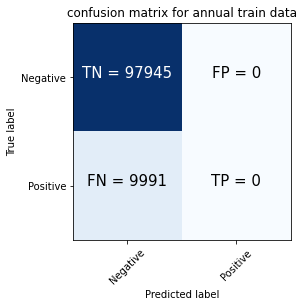

/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
precision: 0.0
recall 0.0


In [0]:
# Step 2.7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall. <== Monthly, Random Forest

#train
cm_plot(trainDF_monthly, best_model_rf_monthly, 'confusion matrix for annual train data')

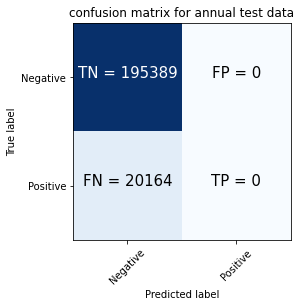

/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
precision: 0.0
recall 0.0


In [0]:
#test
cm_plot(testDF_monthly, best_model_rf_monthly, 'confusion matrix for annual test data')

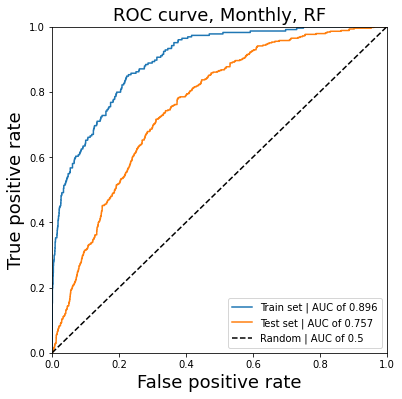

In [0]:
roc_train_test_curve(best_model_rf_annual,trainDF_annual,testDF_annual, 'ROC curve, Monthly, RF')

# Comparison of methods
* Compare the two feature engineering (annual and monthly) and the three modeling approaches (L1 log-reg, tree, forests)
* Best combination of feature engineering and modeling approach:  
* Tabularize your findings in steps 5-7 to summarize the results and support your decision

|Feature| approach |auc_train|auc_test|recall_train|recall_test|preci_train|preci_test|
|-------|----------|---------|--------|------------|-----------|-----------|----------|
| Annual|L1 log_reg|0.761    | 0.806  |0.018       |0.033      |0.167      | 0.412    |
|       |   tree   |0.789    | 0.734  |0.080       |0.284      |0.818      | 0.2      |
|       |  forests |0.896    | 0.757  |0           |0          |0          | 0        |
|Monthly|L1 log_reg|0.628    | 0.625  |0           |0          |0          | 0        |
|       |   tree   |0.615    | 0.612  |0.0002      |0.00005    |1          | 1        |
|       |  forests |0.896    | 0.757  |0           |0          |0          | 0        |

As we are doing prediction on the response of client to a promotion campaign, we want to miss less potential cilent comparing with annoying a little more of them who may not going to accept the promotion, considering the main purpose is to make money. As a result, the value of the recall seems to be more important.

Among the 6 combinations of dataset and approch, the annual features with decision tree is chosen as recall values are higher. And the values of AUC are also quite high at the same time, both above 70%; besides, the precisions are better even though the test value is lower which seems to be underfitted.